In [58]:
import os
import random
import numpy as np

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [59]:
import pandas as pd 

train_org = pd.read_csv('../data/open/train.csv') 
test_org = pd.read_csv('../data/open/test.csv')

display(train_org.head())
display(test_org.tail())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차
10962,ACCIDENT_50571,2022-12-31 21,토요일,맑음,대구광역시 동구 효목동,교차로 - 교차로부근,건조,차대차


In [60]:
display(f"train : {train_org.iloc[0]['사고일시']} ~ {train_org.iloc[-1]['사고일시']}")
display(f"test : {test_org.iloc[0]['사고일시']} ~ {test_org.iloc[-1]['사고일시']}")     

'train : 2019-01-01 00 ~ 2021-12-31 23'

'test : 2022-01-01 01 ~ 2022-12-31 21'

In [61]:
sample_submission = pd.read_csv("../data/open/sample_submission.csv")
sample_submission.head()

,ID,ECLO
0,ACCIDENT_39609,0
1,ACCIDENT_39610,0
2,ACCIDENT_39611,0
3,ACCIDENT_39612,0
4,ACCIDENT_39613,0


In [62]:
train_df = train_org.copy()
test_df = test_org.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})' 

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다 
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거합니다 

# 해당 과정을 test_x에 대해서도 반복해줍니다 
test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',\n       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '연', '월', '일', '시간'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간'], dtype='object')"

In [63]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',\n       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',\n       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',\n       'ECLO', '연', '월', '일', '시간', '도시', '구', '동'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시',\n       '구', '동'],\n      dtype='object')"

In [64]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

display(f"columns of train_df : {train_df.columns}")
display(f"columns of test_df : {test_df.columns}")

"columns of train_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',\n       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',\n       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',\n       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2'],\n      dtype='object')"

"columns of test_df : Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',\n       '도로형태1', '도로형태2'],\n      dtype='object')"

In [65]:
display(train_df.head())
display(test_df.head())

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,...,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,...,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,...,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,...,3,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타
3,ACCIDENT_00003,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,...,5,2019,1,1,2,대구광역시,북구,복현동,단일로,기타
4,ACCIDENT_00004,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,...,3,2019,1,1,4,대구광역시,동구,신암동,단일로,기타


,ID,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_39609,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안
1,ACCIDENT_39610,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타
2,ACCIDENT_39611,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안
3,ACCIDENT_39612,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타
4,ACCIDENT_39613,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안


,요일,구,ECLO
0,금요일,남구,4.453333
1,금요일,달서구,4.582951
2,금요일,달성군,4.967391
3,금요일,동구,4.804213
4,금요일,북구,4.502361


array(['남구', '달서구', '달성군', '동구', '북구', '서구', '수성구', '중구'], dtype=object)

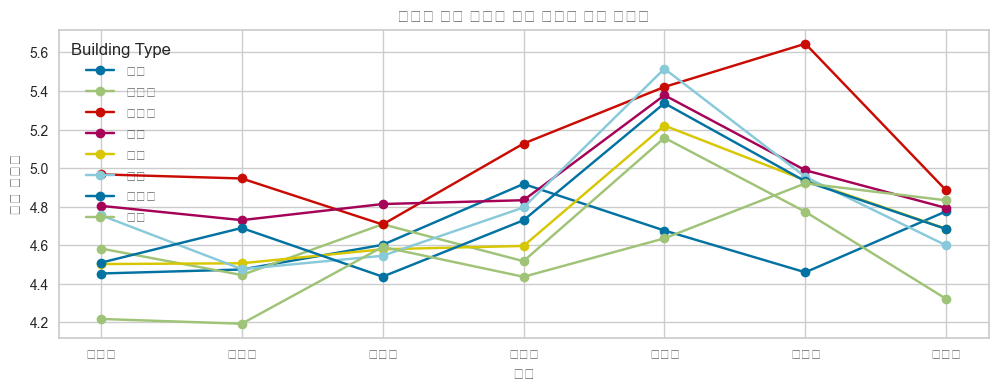

In [66]:
weekday_gu_stats = train_df.groupby(['요일','구'])['ECLO'].mean().reset_index()
display(weekday_gu_stats.head())
display(weekday_gu_stats['구'].unique())

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

for gu_name in weekday_gu_stats['구'].unique():
    subset = weekday_gu_stats[weekday_gu_stats['구'] == gu_name]
    plt.plot(subset['요일'], subset['ECLO'], marker='o', label=gu_name)

plt.xticks(ticks=range(7), labels=['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '월요일'])
plt.xlabel('요일')
plt.ylabel('사고 위험도')
plt.title('대구시 행정 구역에 따른 요일별 사고 위험도')
plt.legend(title='Building Type')
plt.grid(True)
plt.show()

In [67]:
test_x = test_df.drop(columns=['ID']).copy()
train_x = train_df[test_x.columns].copy()
train_y = train_df['ECLO'].copy()

In [68]:
# from sklearn.preprocessing import LabelEncoder

# categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)
# # 추출된 문자열 변수 확인
# display(categorical_features)

# for i in categorical_features:
#     le = LabelEncoder()
#     le=le.fit(train_x[i]) 
#     train_x[i]=le.transform(train_x[i])
    
#     for case in np.unique(test_x[i]):
#         if case not in le.classes_: 
#             le.classes_ = np.append(le.classes_, case) 
#     test_x[i]=le.transform(test_x[i])
    
# display(train_x.head())
# display(test_x.head())

In [69]:
categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first'는 더미 변수 하나를 제거함
train_x_encoded = encoder.fit_transform(train_x[categorical_features])
test_x_encoded = encoder.transform(test_x[categorical_features])

# 범주형 변수를 더미 변수로 변환합니다.
train_x_encoded = encoder.transform(train_x[categorical_features])
test_x_encoded = encoder.transform(test_x[categorical_features])

# 더미 변수를 데이터프레임으로 만듭니다.
train_x_encoded_df = pd.DataFrame(train_x_encoded, columns=[f'encoded_{i}' for i in range(train_x_encoded.shape[1])])
test_x_encoded_df = pd.DataFrame(test_x_encoded, columns=[f'encoded_{i}' for i in range(test_x_encoded.shape[1])])

# 기존 train_x와 test_x 데이터프레임에서 범주형 열을 삭제합니다.
train_x = train_x.drop(columns=categorical_features)
test_x = test_x.drop(columns=categorical_features)

# 더미 변수를 기존 train_x와 test_x 데이터프레임에 추가합니다.
train_x = pd.concat([train_x, train_x_encoded_df], axis=1)
test_x = pd.concat([test_x, test_x_encoded_df], axis=1)


In [70]:
train_x.fillna(0, inplace=True)
test_x.fillna(0, inplace=True)

In [71]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor() 
dt.fit(train_x, train_y)

dt_pred = dt.predict(test_x)
dt_pred

array([3., 5., 5., ..., 3., 3., 3.])

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train_x,train_y)

rf_pred = rf.predict(test_x)
rf_pred

KeyboardInterrupt: 

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(train_x, train_y)

xgb_pred = xgb.predict(test_x)
xgb_pred

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(train_x, train_y)

etr_pred = etr.predict(test_x)
etr_pred

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(train_x,train_y)

gb_pred = gb.predict(test_x)
gb_pred

In [ ]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(train_x,train_y)

cat_pred = cat.predict(test_x)
cat_pred

In [73]:
train = pd.concat([train_x,train_y], axis=1)

In [74]:
train.head()

,연,월,일,시간,encoded_0,encoded_1,encoded_2,encoded_3,encoded_4,encoded_5,...,encoded_224,encoded_225,encoded_226,encoded_227,encoded_228,encoded_229,encoded_230,encoded_231,encoded_232,ECLO
0,2019,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
1,2019,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2,2019,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
3,2019,1,1,2,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
4,2019,1,1,4,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3


In [75]:
from pycaret.regression import *
setup_rgs = setup(data=train, target='ECLO',session_id=10)
top5 = compare_models(sort='RMSLE', n_select=5)

,Description,Value
0,Session id,10
1,Target,ECLO
2,Target type,Regression
3,Original data shape,"(39609, 238)"
4,Transformed data shape,"(39609, 238)"
5,Transformed train set shape,"(27726, 238)"
6,Transformed test set shape,"(11883, 238)"
7,Numeric features,237
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,2.0626,10.2356,3.1949,-0.0163,0.4469,0.5307,2.9050
gbr,Gradient Boosting Regressor,2.1298,9.7448,3.1175,0.0323,0.4579,0.6229,5.1610
br,Bayesian Ridge,2.1329,9.7717,3.1219,0.0295,0.4587,0.6236,0.6310
omp,Orthogonal Matching Pursuit,2.1356,9.7923,3.1252,0.0274,0.4595,0.6247,0.1960
ridge,Ridge Regression,2.1411,9.8134,3.1286,0.0254,0.4601,0.6242,0.2140
lightgbm,Light Gradient Boosting Machine,2.1445,9.8458,3.1339,0.0220,0.4605,0.6253,0.7210
catboost,CatBoost Regressor,2.1474,9.8901,3.1409,0.0176,0.4613,0.6252,4.6240
lasso,Lasso Regression,2.1581,10.0709,3.1696,-0.0005,0.4660,0.6352,0.1840
en,Elastic Net,2.1581,10.0709,3.1696,-0.0005,0.4660,0.6352,0.1840
llar,Lasso Least Angle Regression,2.1581,10.0709,3.1696,-0.0005,0.4660,0.6352,0.1910


In [76]:
# 모델 생성
m1 = create_model('huber')
m2 = create_model('gbr')
m3 = create_model('br')
m4 = create_model('omp')
m5 = create_model('ridge')

# 모델 튜닝
model1 = tune_model(m1)
model2 = tune_model(m2)
model3 = tune_model(m3)
model4 = tune_model(m4)
model5 = tune_model(m5)

# 모델 블렌딩
tuned = [model1, model2, model3, model4, model5]
blender = blend_models(tuned)

pred = predict_model(blender,data=test_x)
pred



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0667,10.2634,3.2037,-0.0152,0.4427,0.5125
1,2.0933,11.9189,3.4524,-0.0222,0.4481,0.5207
2,2.0087,9.5550,3.0911,-0.0107,0.4400,0.5302
3,2.1327,11.0108,3.3182,-0.0149,0.4620,0.5572
4,2.0022,9.2239,3.0371,-0.0040,0.4387,0.5287
5,2.0816,11.0961,3.3311,-0.0248,0.4471,0.5187
6,2.0458,9.5151,3.0846,-0.0191,0.4470,0.5324
7,2.1595,11.7779,3.4319,-0.0285,0.4619,0.5394
8,2.0220,8.9426,2.9904,-0.0123,0.4388,0.5274


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1368,9.7658,3.1250,0.0341,0.4528,0.6026
1,2.1434,11.3201,3.3645,0.0292,0.4554,0.6059
2,2.0875,9.1551,3.0257,0.0316,0.4542,0.6249
3,2.2034,10.4752,3.2365,0.0344,0.4734,0.6562
4,2.0803,8.7712,2.9616,0.0452,0.4518,0.6229
5,2.1389,10.5972,3.2553,0.0212,0.4568,0.6064
6,2.1064,9.0254,3.0042,0.0333,0.4567,0.6217
7,2.2195,11.1538,3.3397,0.0260,0.4705,0.6334
8,2.0956,8.5623,2.9261,0.0308,0.4513,0.6197


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1406,9.7668,3.1252,0.0340,0.4540,0.6052
1,2.1465,11.3448,3.3682,0.0271,0.4563,0.6063
2,2.0946,9.2435,3.0403,0.0223,0.4559,0.6262
3,2.2080,10.5156,3.2428,0.0307,0.4740,0.6562
4,2.0863,8.8371,2.9727,0.0381,0.4528,0.6243
5,2.1376,10.5790,3.2525,0.0229,0.4570,0.6059
6,2.1105,9.0589,3.0098,0.0297,0.4582,0.6236
7,2.2156,11.1603,3.3407,0.0255,0.4705,0.6310
8,2.0965,8.5443,2.9231,0.0328,0.4516,0.6210


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1425,9.7626,3.1245,0.0344,0.4544,0.6065
1,2.1559,11.3806,3.3735,0.0240,0.4578,0.6092
2,2.0977,9.2813,3.0465,0.0183,0.4569,0.6275
3,2.2133,10.5386,3.2463,0.0286,0.4750,0.6580
4,2.0837,8.8568,2.9760,0.0359,0.4535,0.6247
5,2.1392,10.5973,3.2554,0.0212,0.4578,0.6072
6,2.1133,9.0967,3.0161,0.0257,0.4594,0.6247
7,2.2164,11.1747,3.3429,0.0242,0.4709,0.6315
8,2.0987,8.5548,2.9249,0.0316,0.4520,0.6211


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1479,9.8572,3.1396,0.0250,0.4562,0.6050
1,2.1499,11.3785,3.3732,0.0242,0.4570,0.6058
2,2.0990,9.2579,3.0427,0.0208,0.4569,0.6253
3,2.2108,10.5232,3.2439,0.0300,0.4747,0.6563
4,2.0979,8.8226,2.9703,0.0396,0.4537,0.6256
5,2.1475,10.6557,3.2643,0.0158,0.4588,0.6064
6,2.1228,9.1118,3.0186,0.0241,0.4597,0.6243
7,2.2277,11.2272,3.3507,0.0196,0.4724,0.6327
8,2.1050,8.6159,2.9353,0.0247,0.4540,0.6235


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0706,10.1845,3.1913,-0.0073,0.4427,0.5211
1,2.0888,11.7891,3.4335,-0.0110,0.4467,0.5265
2,2.0131,9.4886,3.0804,-0.0036,0.4402,0.5387
3,2.1518,11.0631,3.3261,-0.0197,0.4648,0.5686
4,2.0080,9.1739,3.0288,0.0014,0.4394,0.5372
5,2.0871,11.0339,3.3217,-0.0191,0.4473,0.5276
6,2.0499,9.4402,3.0725,-0.0111,0.4473,0.5415
7,2.1608,11.6703,3.4162,-0.0191,0.4612,0.5472
8,2.0274,8.8724,2.9787,-0.0043,0.4389,0.5357


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1425,9.8486,3.1382,0.0259,0.4550,0.6038
1,2.1472,11.3773,3.3730,0.0243,0.4571,0.6067
2,2.1005,9.2715,3.0449,0.0193,0.4564,0.6260
3,2.2149,10.5460,3.2475,0.0279,0.4759,0.6592
4,2.1063,8.8543,2.9756,0.0362,0.4538,0.6260
5,2.1512,10.6888,3.2694,0.0128,0.4595,0.6081
6,2.1249,9.1055,3.0175,0.0247,0.4595,0.6276
7,2.2403,11.2601,3.3556,0.0168,0.4731,0.6395
8,2.1125,8.6701,2.9445,0.0186,0.4562,0.6305


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1406,9.7669,3.1252,0.0340,0.4540,0.6052
1,2.1464,11.3449,3.3682,0.0271,0.4563,0.6062
2,2.0947,9.2433,3.0403,0.0223,0.4559,0.6262
3,2.2080,10.5152,3.2427,0.0308,0.4740,0.6562
4,2.0864,8.8362,2.9726,0.0382,0.4528,0.6242
5,2.1376,10.5791,3.2526,0.0229,0.4570,0.6059
6,2.1106,9.0591,3.0098,0.0297,0.4582,0.6236
7,2.2157,11.1605,3.3407,0.0255,0.4705,0.6310
8,2.0965,8.5445,2.9231,0.0328,0.4516,0.6210


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1404,9.7729,3.1262,0.0334,0.4546,0.6068
1,2.1530,11.3717,3.3722,0.0248,0.4574,0.6082
2,2.0936,9.2666,3.0441,0.0198,0.4563,0.6265
3,2.2119,10.5449,3.2473,0.0280,0.4750,0.6576
4,2.0833,8.8700,2.9783,0.0345,0.4536,0.6245
5,2.1409,10.6179,3.2585,0.0193,0.4582,0.6076
6,2.1074,9.0591,3.0098,0.0297,0.4581,0.6227
7,2.2187,11.1847,3.3444,0.0233,0.4714,0.6331
8,2.1006,8.5693,2.9273,0.0300,0.4525,0.6220


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1434,9.8101,3.1321,0.0297,0.4551,0.6044
1,2.1486,11.3640,3.3711,0.0254,0.4568,0.6057
2,2.0985,9.2475,3.0410,0.0219,0.4565,0.6257
3,2.2091,10.5130,3.2424,0.0310,0.4744,0.6561
4,2.0942,8.8154,2.9691,0.0404,0.4532,0.6245
5,2.1440,10.6204,3.2589,0.0191,0.4581,0.6063
6,2.1180,9.0874,3.0145,0.0267,0.4590,0.6236
7,2.2238,11.1949,3.3459,0.0224,0.4717,0.6319
8,2.1012,8.5853,2.9301,0.0282,0.4532,0.6224


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1171,9.7746,3.1264,0.0332,0.4493,0.5860
1,2.1263,11.3582,3.3702,0.0259,0.4522,0.5887
2,2.0685,9.2027,3.0336,0.0266,0.4503,0.6067
3,2.1865,10.5185,3.2432,0.0304,0.4693,0.6369
4,2.0607,8.8035,2.9671,0.0417,0.4474,0.6048
5,2.1193,10.6024,3.2561,0.0208,0.4529,0.5887
6,2.0902,9.0588,3.0098,0.0297,0.4536,0.6051
7,2.1980,11.1864,3.3446,0.0232,0.4665,0.6132
8,2.0742,8.5419,2.9227,0.0331,0.4469,0.6020


,연,월,일,시간,encoded_0,encoded_1,encoded_2,encoded_3,encoded_4,encoded_5,...,encoded_224,encoded_225,encoded_226,encoded_227,encoded_228,encoded_229,encoded_230,encoded_231,encoded_232,prediction_label
0,2022,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.236192
1,2022,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.013909
2,2022,1,1,4,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.271431
3,2022,1,1,4,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.942951
4,2022,1,1,6,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.087098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,2022,12,31,18,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.012102
10959,2022,12,31,18,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.633548
10960,2022,12,31,20,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.586284
10961,2022,12,31,20,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.481465


In [77]:
pred

,연,월,일,시간,encoded_0,encoded_1,encoded_2,encoded_3,encoded_4,encoded_5,...,encoded_224,encoded_225,encoded_226,encoded_227,encoded_228,encoded_229,encoded_230,encoded_231,encoded_232,prediction_label
0,2022,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.236192
1,2022,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.013909
2,2022,1,1,4,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.271431
3,2022,1,1,4,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.942951
4,2022,1,1,6,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.087098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,2022,12,31,18,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.012102
10959,2022,12,31,18,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.633548
10960,2022,12,31,20,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.586284
10961,2022,12,31,20,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.481465


In [78]:
prediction = pred['prediction_label']

In [79]:
baseline_submission = sample_submission.copy()
baseline_submission['ECLO'] = prediction
baseline_submission 

,ID,ECLO
0,ACCIDENT_39609,4.236192
1,ACCIDENT_39610,4.013909
2,ACCIDENT_39611,5.271431
3,ACCIDENT_39612,4.942951
4,ACCIDENT_39613,5.087098
...,...,...
10958,ACCIDENT_50567,5.012102
10959,ACCIDENT_50568,4.633548
10960,ACCIDENT_50569,4.586284
10961,ACCIDENT_50570,5.481465


In [80]:
baseline_submission.to_csv('pycaret_blending_OE.csv', index=False)